In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_Data = pd.merge(study_results, mouse_metadata, how="left", on = 'Mouse ID')
Combined_Data.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
mice_count = Combined_Data['Mouse ID'].unique().size
mice_count

249

In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
gp = Combined_Data.groupby(["Mouse ID", "Timepoint"])
cd = gp.count()
gp.count()

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
a203     0                           1                 1             1    1   
         5                           1                 1             1    1   
         10                          1                 1             1    1   
         15                          1                 1             1    1   
         20                          1                 1             1    1   
...                                ...               ...           ...  ...   
z969     25                          1                 1             1    1   
         30                          1                 1             1    1   
         35                          1                 1             1    1   
         40                          1                 1             1    1   
         45                          1                 1             1    1   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
a203     0                   1           1  
         5                   1           1  
         10                  1           1  
         15                  1           1  
         20                  1           1  
...                        ...         ...  
z969     25                  1           1  
         30                  1           1  
         35                  1           1  
         40                  1           1  
         45                  1           1  

[1888 rows x 6 columns]

In [80]:
Duplicate_ID = pd.DataFrame(cd.loc[cd['Age_months']>1,:])
Duplicate_ID


Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [81]:
# Optional: Get all the data for the duplicate mouse ID.
dp_mouse = Combined_Data.loc[Combined_Data['Mouse ID'] == "g989"]
dp_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Combined_Data = Combined_Data.set_index('Mouse ID')
Clean_Combined_Data = Clean_Combined_Data.drop(index = 'g989')
Clean_Combined_Data = Clean_Combined_Data.reset_index()
Clean_Combined_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
mice_count = Clean_Combined_Data['Mouse ID'].unique().size
mice_count

248

# ***Summary Statistics ***


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

gp_regimen = Clean_Combined_Data.groupby(["Drug Regimen"])
mean_tumer_volume = gp_regimen["Tumor Volume (mm3)"].mean()

median_tumer_volume = gp_regimen["Tumor Volume (mm3)"].median()

variance_tumer_volume = gp_regimen["Tumor Volume (mm3)"].var()

std_tumer_volume = gp_regimen["Tumor Volume (mm3)"].std()

sem_tumer_volume = gp_regimen["Tumor Volume (mm3)"].sem()

statistic_summary = pd.DataFrame({'Mean Tumor Volume' : mean_tumer_volume,'Median Tumor Volume' : median_tumer_volume, 'Tumor Volume Variance' : variance_tumer_volume,
                               'Tumor Volume Std. Dev.' : std_tumer_volume, 'Tumor Volume Std. Err.' : sem_tumer_volume })
statistic_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_statistic_summary = Clean_Combined_Data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])
advanced_statistic_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# ***Bar and Pie Charts***

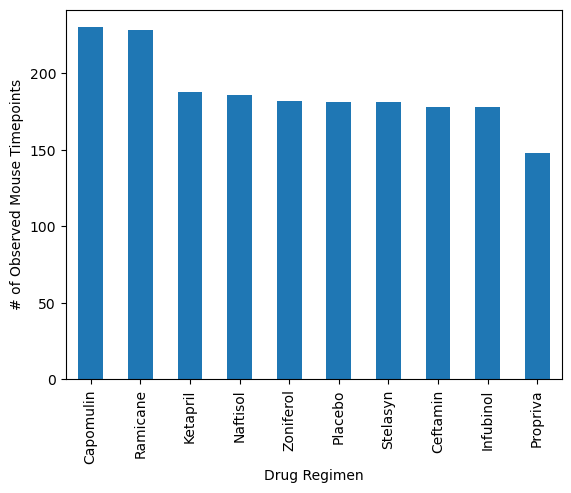

<Figure size 640x480 with 0 Axes>

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# gp_regimen.count()
bar_chart = gp_regimen['Mouse ID'].count().sort_values(ascending=False)

bar_chart.plot(kind="bar")


plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

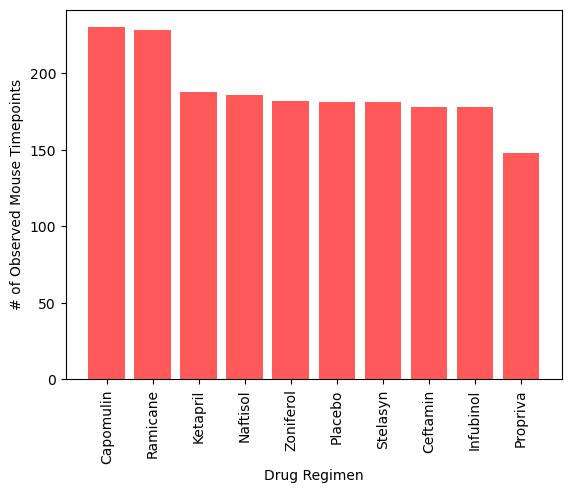

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart2 = pd.DataFrame({'count' : bar_chart })

x_axis = np.arange(len(bar_chart2))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, bar_chart2["count"], color = 'r', alpha = 0.65,  align="center")
plt.xticks(tick_locations, bar_chart2.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

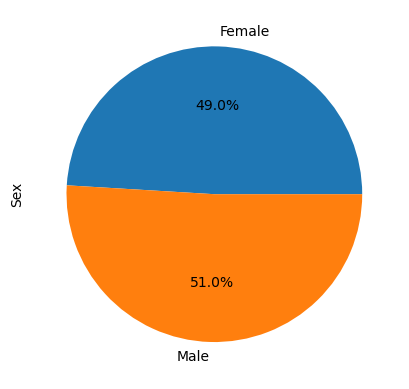

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
g_sex = Clean_Combined_Data.groupby(["Sex"])['Mouse ID'].count()
g_sex.plot(kind="pie", ylabel = 'Sex', autopct = '%1.1f%%')


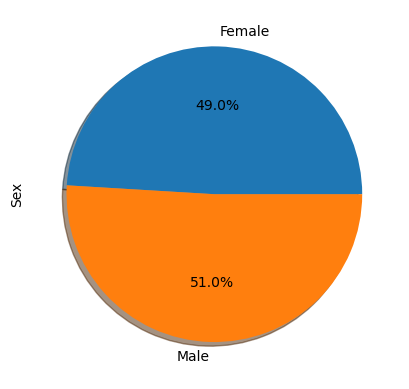

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

g_sex2 = pd.DataFrame({'count' : g_sex })

plt.pie(g_sex2['count'], labels= g_sex2.index,
        autopct="%1.1f%%", shadow=True, startangle=0)
# plt.axis("equal")
plt.ylabel("Sex")
plt.show()

# ***Quartiles, Outliers and Boxplots***


In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

four_mouse_data =Clean_Combined_Data.loc[(Clean_Combined_Data['Drug Regimen'] == "Capomulin") | (Clean_Combined_Data['Drug Regimen'] == "Ramicane")
|(Clean_Combined_Data['Drug Regimen'] == "Infubinol")|(Clean_Combined_Data['Drug Regimen'] == "Ceftamin")]

four_mouse_data = four_mouse_data.groupby(["Drug Regimen"])["Timepoint"].aggregate(['max'])
four_mouse_data = four_mouse_data.reset_index().rename(columns={'max':'Timepoint'})



four_mouse_data = pd.merge(Clean_Combined_Data, four_mouse_data, how="right", on = ['Drug Regimen','Timepoint'])
four_mouse_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,t565,45,34.455298,0,Capomulin,Female,20,17
2,l509,45,41.483008,3,Capomulin,Male,17,21
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,r554,45,32.377357,3,Capomulin,Female,8,17


In [91]:
Capomulin = four_mouse_data.loc[(four_mouse_data['Drug Regimen'] == "Capomulin")]["Tumor Volume (mm3)"]
Ceftamin = four_mouse_data.loc[(four_mouse_data['Drug Regimen'] == "Ceftamin")]["Tumor Volume (mm3)"]
Infubinol = four_mouse_data.loc[(four_mouse_data['Drug Regimen'] == "Infubinol")]["Tumor Volume (mm3)"]
Ramicane = four_mouse_data.loc[(four_mouse_data['Drug Regimen'] == "Ramicane")]["Tumor Volume (mm3)"]




# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

box_plot_data = [Capomulin,Ramicane,Infubinol,Ceftamin]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
k=0
for i in box_plot_data:
    
    k = k+1

    quartiles = i.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if k == 1:
        print(f"Values below {lower_bound} could be potential outliers for Capomulin")
        print(f"Values above {upper_bound} could be potential outliers for Capomulin")
        
    elif k ==2:
        
        print(f"Values below {lower_bound} could be potential outliers for Ramicane")
        print(f"Values above {upper_bound} could be potential outliers for Ramicane")
        
    elif k==3:
        
        print(f"Values below {lower_bound} could be potential outliers for Infubinol")
        print(f"Values above {upper_bound} could be potential outliers for Infubinol")
        
    else:
        print(f"Values below {lower_bound} could be potential outliers for Ceftamin")
        print(f"Values above {upper_bound} could be potential outliers for Ceftamin")
        
        



    # add subset


    # Determine outliers using upper and lower bounds

Values below 20.70456164999999 could be potential outliers for Capomulin
Values above 51.83201549 could be potential outliers for Capomulin
Values below 19.69048010125 could be potential outliers for Ramicane
Values above 49.79900043125001 could be potential outliers for Ramicane
Values below 55.35777559500001 could be potential outliers for Infubinol
Values above 75.08224443499999 could be potential outliers for Infubinol
Values below 52.29350701999999 could be potential outliers for Ceftamin
Values above 76.66786758 could be potential outliers for Ceftamin


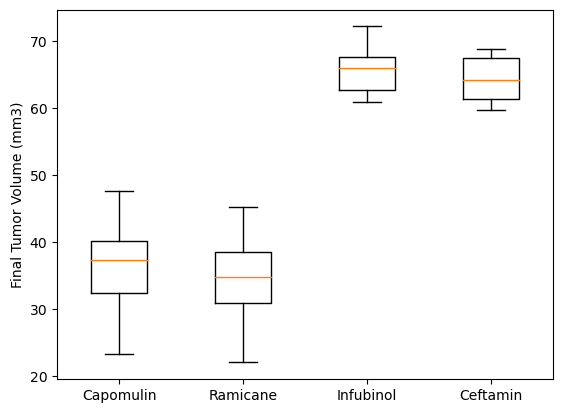

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig, ax = plt.subplots()
ax.boxplot(box_plot_data, labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'])


ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

# ***Line and Scatter Plots***

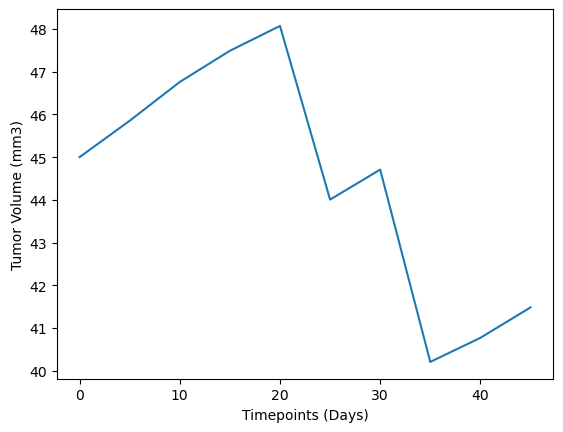

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = Clean_Combined_Data.loc[ (Clean_Combined_Data['Drug Regimen'] == "Capomulin") & (Clean_Combined_Data['Mouse ID'] == "l509")]
single_mouse_data.head()
plt.plot(single_mouse_data.iloc[:,1],single_mouse_data.iloc[:,2])
plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

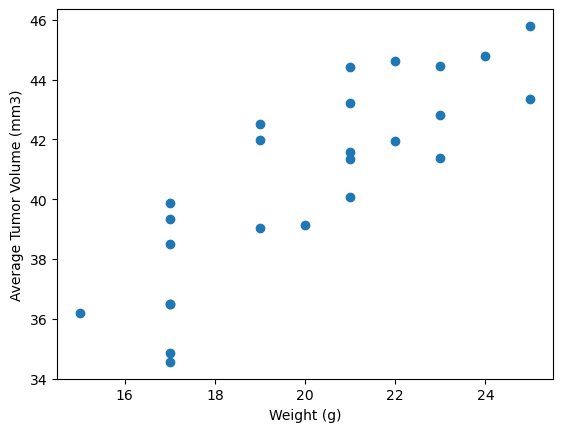

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
single_capomulin_data = Clean_Combined_Data.loc[ (Clean_Combined_Data['Drug Regimen'] == "Capomulin") ]
Avg_tumor_volume = single_capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
Mouse_weight =  single_capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
plt.scatter(Mouse_weight, Avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between both factors is 0.84


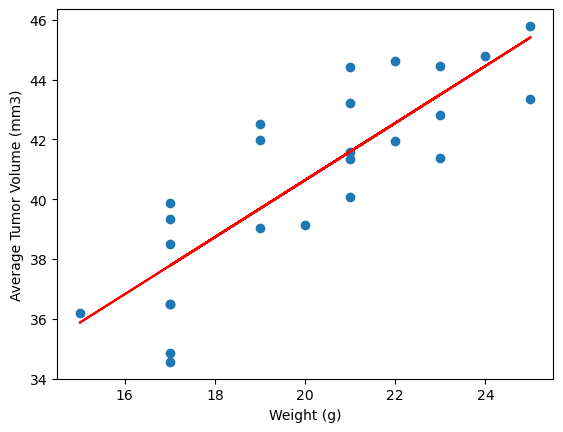

In [95]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
 # Print out the r-squared value along with the plot.
x_values = Mouse_weight
y_values = Avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
# print(f"The r-squared is: {rvalue**2}", line_eq)
plt.show()
correlation = st.pearsonr(x_values,y_values)
